# Model on Estado de México

### Load model

In [1]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Autoreload
%load_ext autoreload
%autoreload 2

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Import data
from bimbo.data import Bimbo

data = Bimbo().get_data()

# Load in the train and test datasets
train_df = data['train']
# test_df = data['test']
# cliente_tabla_df = data['cliente_tabla']
# producto_tabla_df = data['producto_tabla']
town_state_df = data['town_state']
# sample_submission_df = data['sample_submission']

# Delete data
import gc
del data
gc.collect()

Memory usage of dataframe is 0.04 MB
Memory usage after optimization is: 0.11 MB
Decreased by -184.7%
Memory usage of dataframe is 14.27 MB
Memory usage after optimization is: 19.51 MB
Decreased by -36.7%
Memory usage of dataframe is 373.80 MB
Memory usage after optimization is: 120.15 MB
Decreased by 67.9%
Memory usage of dataframe is 0.02 MB
Memory usage after optimization is: 0.02 MB
Decreased by 6.0%
Memory usage of dataframe is 6225.47 MB
Memory usage after optimization is: 2122.32 MB
Decreased by 65.9%
Memory usage of dataframe is 106.80 MB
Memory usage after optimization is: 33.38 MB
Decreased by 68.7%


42

### Create clusters of Products

In [2]:
products_id_clusters_df = pd.read_csv('../data/producto_clusters.csv')

In [3]:
new_train_df = pd.merge(train_df, products_id_clusters_df, how='left', on='Producto_ID')

### Create a category of location based on zip code

In [4]:
new_train_df = pd.merge(new_train_df, town_state_df, how='left', on='Agencia_ID')

### Feature Engineering

In [5]:
from bimbo.preprocessing import *
from bimbo.feature_engineering import *

In [6]:
new_train_df = new_train_df[new_train_df['State'] == 'ESTADO DE MÉXICO']

In [7]:
new_train_df.head(3)

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,short_name,brand,Town,State
75360,3,1112,1,1001,327267,693,5,48.000000,0,0.0,5,Tostada Plana,MR,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
75361,3,1112,1,1001,327267,1109,5,75.050003,0,0.0,5,Pan Blanco Chico,BIM,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
75362,3,1112,1,1001,327267,1125,10,96.000000,0,0.0,10,Tortillinas,TR,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO


In [8]:
val_df = new_train_df[new_train_df['Semana'] == 8]
test_df = new_train_df[new_train_df['Semana'] == 9]
train_df = new_train_df[new_train_df['Semana'] < 8]

final_y_test = test_df['Demanda_uni_equil'] # for later

del new_train_df
gc.collect()

41

In [9]:
train_df = data_preprocess(train_df)
val_df = data_preprocess(val_df)
test_df = data_preprocess(test_df)

In [10]:
train_df = change_type_to_categ2(train_df)
val_df = change_type_to_categ2(val_df)
test_df = change_type_to_categ2(test_df)

In [11]:
temp = feature_engineering2(train_df)

In [12]:
val = merge_feature2(val_df, temp, 'val')

In [13]:
val.to_csv('../data/processed_val_3.csv', index=False)

In [14]:
frames = [train_df, val_df]
result = pd.concat(frames)
temp = feature_engineering2(result)

In [15]:
test = merge_feature2(test_df, temp, 'test')

In [16]:
test.to_csv('../data/processed_test_3.csv', index=False)

In [17]:
val.head(3)

,Demanda_uni_equil,log_demanda_uni_equil,mean_due_agencia,mean_due_canal,mean_due_ruta,mean_due_cliente,mean_due_prod_age,mean_due_prod_rut,mean_due_prod_cli,mean_due_prod_can,mean_due_prod_cli_age,mean_vh_agencia,std_due_acrcp,mean_due_acrcp,mean_due_cli_clu,max_due_prod_cli
0,3,1.386294,1.554452,1.501275,1.587864,1.547503,1.416350,1.500573,1.454480,1.334197,1.454480,3.502226,0.261586,1.454480,1.454480,1.791759
1,1,0.693147,1.554452,1.501275,1.587864,1.547503,1.455031,1.525661,1.593109,1.219927,1.593109,3.502226,0.202938,1.593109,1.593109,1.791759
2,2,1.098612,1.554452,1.501275,1.587864,1.547503,1.913890,2.040523,2.130225,1.698476,2.130225,3.502226,0.235092,2.130225,1.983213,2.397895


In [18]:
test.head(3)

,mean_due_agencia,mean_due_canal,mean_due_ruta,mean_due_cliente,mean_due_prod_age,mean_due_prod_rut,mean_due_prod_cli,mean_due_prod_can,mean_due_prod_cli_age,mean_vh_agencia,std_due_acrcp,mean_due_acrcp,mean_due_cli_clu,max_due_prod_cli
0,1.552221,1.50034,1.588804,1.524993,1.453920,1.523583,1.443115,1.219733,1.443115,3.496826,0.409800,1.443115,1.443115,1.791759
1,1.552221,1.50034,1.588804,1.524993,1.925683,2.034006,1.958289,1.703149,1.958289,3.496826,0.470728,1.958289,1.886415,2.397895
2,1.552221,1.50034,1.588804,1.524993,1.615046,1.649117,1.804624,1.437196,1.804624,3.496826,0.316486,1.804624,1.886415,2.197225


### Prepare data for XGBoost

In [19]:
X = val.drop('log_demanda_uni_equil', axis=1)
y = val['log_demanda_uni_equil']

In [20]:
from bimbo.xgboost_models import *

In [21]:
model = build_model(X, y)

[23:35:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:0.775665	validation_0-rmse:0.989818	validation_1-mae:0.777305	validation_1-rmse:0.992126
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1 rounds.
[1]	validation_0-mae:0.591464	validation_0-rmse:0.766728	validation_1-mae:0.592846	validation_1-rmse:0.768323
[2]	validation_0-mae:0.481842	validation_0-rmse:0.627221	validation_1-mae:0.483048	validation_1-rmse:0.628367
[3]	validation_0-mae:0.418751	validation_0-rmse:0.54528	validation_1-mae:0.419902	validation_1-rmse:0.546136
[4]	validation_0-mae:0.3825	validation_0-rmse:0.498863	validation_1-mae:0.383551	validation_1-rmse:0.499637
[5]	validation_0-mae:0.362459	validation_0-rmse:0.47443	validation_1-mae:0.363446	validation_1-rmse:0.475112
[6]	validation_0-mae:0.350922	validation_0-rmse:0.461191	validation_1-

Stopping. Best iteration:
[70]	validation_0-mae:0.32796	validation_0-rmse:0.436533	validation_1-mae:0.330524	validation_1-rmse:0.439999



### Save model to file

In [22]:
# save model to file (pickle & joblib)
save_model(model, "model_estado_mex_1")

Saved model to: model_estado_mex_1.pickle.dat
Saved model to: model_estado_mex_1.joblib.dat


### Data analysis

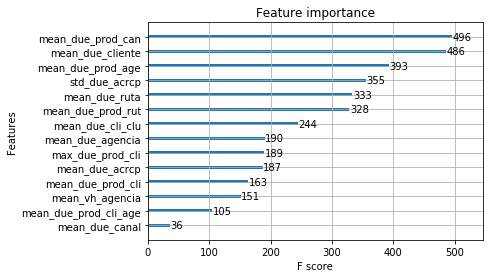

In [23]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

- compute on **validation sets**

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
        test_size=0.5, random_state=42)

X_train.drop(['Demanda_uni_equil'], axis=1, inplace=True)
X_val.drop(['Demanda_uni_equil'], axis=1, inplace=True)

In [25]:
# make predictions for val data and evaluate
predictions = model.predict(X_val)

In [26]:
final_predictions = np.expm1(predictions).round().astype(int)
final_y_val = np.expm1(y_val).round().astype(int)

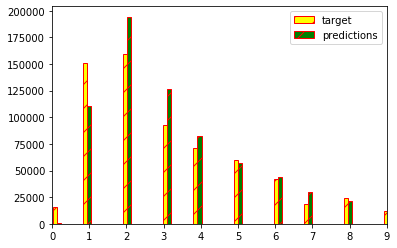

In [27]:
x1 = final_y_val
x2 = pd.Series(final_predictions)
bins = 10000

plt.hist([x1, x2], bins = bins, color = ['yellow', 'green'],
            edgecolor = 'red', hatch = '/', label = ['target', 'predictions'],
            histtype = 'bar')
plt.legend(loc='upper right')
plt.xlim(0, 9)
plt.show()

- compute on **test sets**

In [40]:
log_y_pred = model.predict(test)
final_predictions = np.expm1(log_y_pred).round().astype(int)
y_pred = pd.DataFrame( {'Demanda_uni_equil':final_predictions} )
y_pred['Demanda_uni_equil']

0           3
1           6
2           4
3           3
4           2
5           4
6           2
7           1
8           1
9           3
10          3
11          7
12          8
13          4
14          4
15          3
16          2
17          6
18          3
19          3
20          3
21          1
22          3
23          1
24          7
25          3
26          2
27          3
28          2
29          2
           ..
1539650     6
1539651     8
1539652     5
1539653     1
1539654     1
1539655     2
1539656     3
1539657     7
1539658     1
1539659     4
1539660     2
1539661     1
1539662     6
1539663     3
1539664     5
1539665     1
1539666     3
1539667     3
1539668     5
1539669     2
1539670     1
1539671     1
1539672     4
1539673     2
1539674     2
1539675     6
1539676     2
1539677     3
1539678     2
1539679    38
Name: Demanda_uni_equil, Length: 1539680, dtype: int64

In [41]:
y_true = pd.DataFrame(final_y_test)
y_true['Demanda_uni_equil']

63842725     5
63842726    10
63842727     8
63842728     4
63842729     2
63842730     5
63842731     1
63842732     1
63842733     3
63842734     2
63842735     6
63842736     5
63842737    10
63842738     4
63842739     4
63842740     3
63842741     1
63842742     6
63842743     2
63842744     3
63842745     6
63842746     1
63842747     4
63842748     2
63842749    10
63842750     2
63842751     1
63842752     2
63842753     2
63842754     2
            ..
73364885     6
73364886     9
73364887    12
73364888     1
73364889     1
73364890     5
73364891     6
73364892     9
73364893     3
73364894     5
73364895     6
73364896     1
73364897     4
73364898     4
73364899     3
73364900     1
73364901     3
73364902     7
73364903     4
73364904     1
73364905     1
73364906     1
73364907     3
73364908     4
73364909     2
73364910     3
73364911     3
73364912     2
73364913     1
73364914    80
Name: Demanda_uni_equil, Length: 1539680, dtype: int16

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

mae = mean_absolute_error(y_true, y_pred)
print(f'mae: {mae}')
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'rmse: {rmse}')
rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
print(f'rmsle: {rmsle}')

mae: 2.48647381274031
rmse: 9.897034135665667
rmsle: 0.44978925629463856
